## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

## 1. Loading the dataset

In [1]:
from zipfile import ZipFile
# specifying the zip file name 
file_name = "UNGDC19702018-200902-235056.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Converted sessions/                            2019-03-14 21:40:02            0
Converted sessions/Session 73 - 2018/          2019-03-14 21:39:40            0
Converted sessions/Session 73 - 2018/BRB_73_2018.txt 2019-03-11 19:20:16        12279
__MACOSX/                                      2019-03-23 19:22:20            0
__MACOSX/Converted sessions/                   2019-03-23 19:22:20            0
__MACOSX/Converted sessions/Session 73 - 2018/ 2019-03-23 19:22:20            0
__MACOSX/Converted sessions/Session 73 - 2018/._BRB_73_2018.txt 2019-03-11 19:20:16          299
Converted sessions/Session 73 - 2018/IND_73_2018.txt 2019-03-11 19:29:54        14518
__MACOSX/Converted sessions/Session 73 - 2018/._IND_73_2018.txt 2019-03-11 19:29:54          299
Converted sessions/Session 73 - 2018/ARG_73_2018.txt 2019-03-11 17:45:16         7334
__MACOSX/Converted sessions/Session 73 - 2018/._ARG_73_2018.txt 2019

Converted sessions/Session 53 - 1998/DEU_53_1998.txt 2014-07-31 15:28:52        20237
__MACOSX/Converted sessions/Session 53 - 1998/._DEU_53_1998.txt 2014-07-31 15:28:52          239
Converted sessions/Session 53 - 1998/COL_53_1998.txt 2014-07-31 15:29:18        16318
__MACOSX/Converted sessions/Session 53 - 1998/._COL_53_1998.txt 2014-07-31 15:29:18          239
Converted sessions/Session 53 - 1998/SLV_53_1998.txt 2014-07-31 15:21:32        11041
__MACOSX/Converted sessions/Session 53 - 1998/._SLV_53_1998.txt 2014-07-31 15:21:32          239
Converted sessions/Session 53 - 1998/GMB_53_1998.txt 2014-07-31 15:27:26        27170
__MACOSX/Converted sessions/Session 53 - 1998/._GMB_53_1998.txt 2014-07-31 15:27:26          239
Converted sessions/Session 53 - 1998/GEO_53_1998.txt 2014-07-31 15:27:36        11879
__MACOSX/Converted sessions/Session 53 - 1998/._GEO_53_1998.txt 2014-07-31 15:27:36          239
Converted sessions/Session 53 - 1998/SAU_53_1998.txt 2014-07-31 15:21:56        22285

Converted sessions/Session 59 - 2004/BGR_59_2004.txt 2014-08-01 00:04:02        13722
__MACOSX/Converted sessions/Session 59 - 2004/._BGR_59_2004.txt 2014-08-01 00:04:02          239
Converted sessions/Session 59 - 2004/GBR_59_2004.txt 2014-07-31 23:52:18        13049
__MACOSX/Converted sessions/Session 59 - 2004/._GBR_59_2004.txt 2014-07-31 23:52:18          239
Converted sessions/Session 59 - 2004/GNB_59_2004.txt 2014-07-31 23:51:36        12300
__MACOSX/Converted sessions/Session 59 - 2004/._GNB_59_2004.txt 2014-07-31 23:51:36          239
Converted sessions/Session 59 - 2004/BRN_59_2004.txt 2014-08-01 00:03:12         8367
__MACOSX/Converted sessions/Session 59 - 2004/._BRN_59_2004.txt 2014-08-01 00:03:12          239
Converted sessions/Session 59 - 2004/MYS_59_2004.txt 2014-07-31 23:43:06        15107
__MACOSX/Converted sessions/Session 59 - 2004/._MYS_59_2004.txt 2014-07-31 23:43:06          239
Converted sessions/Session 59 - 2004/CAF_59_2004.txt 2014-08-01 00:01:26        17450

Converted sessions/Session 57 - 2002/SVK_57_2002.txt 2013-05-13 14:08:06        10519
__MACOSX/Converted sessions/Session 57 - 2002/._SVK_57_2002.txt 2013-05-13 14:08:06          239
Converted sessions/Session 57 - 2002/FJI_57_2002.txt 2013-05-13 14:08:06        15962
__MACOSX/Converted sessions/Session 57 - 2002/._FJI_57_2002.txt 2013-05-13 14:08:06          239
Converted sessions/Session 57 - 2002/TZA_57_2002.txt 2013-05-11 16:21:10        14431
__MACOSX/Converted sessions/Session 57 - 2002/._TZA_57_2002.txt 2013-05-11 16:21:10          239
Converted sessions/Session 57 - 2002/DZA_57_2002.txt 2013-05-11 16:23:40        11376
__MACOSX/Converted sessions/Session 57 - 2002/._DZA_57_2002.txt 2013-05-11 16:23:40          239
Converted sessions/Session 57 - 2002/PHL_57_2002.txt 2013-05-11 16:21:10         9877
__MACOSX/Converted sessions/Session 57 - 2002/._PHL_57_2002.txt 2013-05-11 16:21:10          239
Converted sessions/Session 57 - 2002/POL_57_2002.txt 2013-05-13 14:08:06        10111

Converted sessions/Session 58 - 2003/LVA_58_2003.txt 2013-04-04 17:45:24        10644
__MACOSX/Converted sessions/Session 58 - 2003/._LVA_58_2003.txt 2013-04-04 17:45:24          239
Converted sessions/Session 58 - 2003/TCD_58_2003.txt 2013-04-05 15:21:00        15527
__MACOSX/Converted sessions/Session 58 - 2003/._TCD_58_2003.txt 2013-04-05 15:21:00          239
Converted sessions/Session 58 - 2003/ARE_58_2003.txt 2013-04-05 13:54:28        11646
__MACOSX/Converted sessions/Session 58 - 2003/._ARE_58_2003.txt 2013-04-05 13:54:28          239
Converted sessions/Session 58 - 2003/ITA_58_2003.txt 2013-04-04 18:28:52        16295
__MACOSX/Converted sessions/Session 58 - 2003/._ITA_58_2003.txt 2013-04-04 18:28:52          239
Converted sessions/Session 58 - 2003/AGO_58_2003.txt 2013-04-05 13:59:52        12191
__MACOSX/Converted sessions/Session 58 - 2003/._AGO_58_2003.txt 2013-04-05 13:59:52          239
Converted sessions/Session 58 - 2003/KIR_58_2003.txt 2013-04-05 15:48:50         8464

__MACOSX/Converted sessions/Session 67 - 2012/._SWE_67_2012.txt 2013-11-23 17:09:26          239
Converted sessions/Session 67 - 2012/JOR_67_2012.txt 2013-11-23 10:47:46         7238
__MACOSX/Converted sessions/Session 67 - 2012/._JOR_67_2012.txt 2013-11-23 10:47:46          239
Converted sessions/Session 67 - 2012/ARG_67_2012.txt 2013-11-23 17:10:32        25051
__MACOSX/Converted sessions/Session 67 - 2012/._ARG_67_2012.txt 2013-11-23 17:10:32          239
Converted sessions/Session 67 - 2012/IND_67_2012.txt 2013-11-23 17:10:32        11866
__MACOSX/Converted sessions/Session 67 - 2012/._IND_67_2012.txt 2013-11-23 17:10:32          239
Converted sessions/Session 67 - 2012/BRB_67_2012.txt 2013-11-23 17:09:26        13524
__MACOSX/Converted sessions/Session 67 - 2012/._BRB_67_2012.txt 2013-11-23 17:09:26          239
Converted sessions/Session 67 - 2012/ALB_67_2012.txt 2013-11-23 17:09:26        14131
__MACOSX/Converted sessions/Session 67 - 2012/._ALB_67_2012.txt 2013-11-23 17:09:26  

Converted sessions/Session 69 - 2014/GAB_69_2014.txt 2015-02-02 17:42:38        12854
__MACOSX/Converted sessions/Session 69 - 2014/._GAB_69_2014.txt 2015-02-02 17:42:38          239
Converted sessions/Session 69 - 2014/HRV_69_2014.txt 2015-02-02 17:12:44        12821
__MACOSX/Converted sessions/Session 69 - 2014/._HRV_69_2014.txt 2015-02-02 17:12:44          239
Converted sessions/Session 69 - 2014/PRY_69_2014.txt 2015-02-03 18:13:36        13980
__MACOSX/Converted sessions/Session 69 - 2014/._PRY_69_2014.txt 2015-02-03 18:13:36          239
Converted sessions/Session 69 - 2014/THA_69_2014.txt 2015-02-03 16:02:54         8159
__MACOSX/Converted sessions/Session 69 - 2014/._THA_69_2014.txt 2015-02-03 16:02:54          239
Converted sessions/Session 69 - 2014/LAO_69_2014.txt 2015-02-03 16:45:06        10047
__MACOSX/Converted sessions/Session 69 - 2014/._LAO_69_2014.txt 2015-02-03 16:45:06          239
Converted sessions/Session 69 - 2014/UKR_69_2014.txt 2015-02-02 16:56:06         5149

Done!


## 2. Data Pre-processing

In [1]:
# importing libraries
import glob
import pandas as pd
import re

In [2]:
# names of all the folders in the dataset
folders = glob.glob('Converted sessions/Session*')

In [3]:
# list of folders
folders

['Converted sessions\\Session 25 - 1970',
 'Converted sessions\\Session 26 - 1971',
 'Converted sessions\\Session 27 - 1972',
 'Converted sessions\\Session 28 - 1973',
 'Converted sessions\\Session 29 - 1974',
 'Converted sessions\\Session 30 - 1975',
 'Converted sessions\\Session 31 - 1976',
 'Converted sessions\\Session 32 - 1977',
 'Converted sessions\\Session 33 - 1978',
 'Converted sessions\\Session 34 - 1979',
 'Converted sessions\\Session 35 - 1980',
 'Converted sessions\\Session 36 - 1981',
 'Converted sessions\\Session 37 - 1982',
 'Converted sessions\\Session 38 - 1983',
 'Converted sessions\\Session 39 - 1984',
 'Converted sessions\\Session 40 - 1985',
 'Converted sessions\\Session 41 - 1986',
 'Converted sessions\\Session 42 - 1987',
 'Converted sessions\\Session 43 - 1988',
 'Converted sessions\\Session 44 - 1989',
 'Converted sessions\\Session 45 - 1990',
 'Converted sessions\\Session 46 - 1991',
 'Converted sessions\\Session 47 - 1992',
 'Converted sessions\\Session 48 -

In [4]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns={'Country','Speech','Session','Year'})

In [5]:
for file in folders:
    print(file)

Converted sessions\Session 25 - 1970
Converted sessions\Session 26 - 1971
Converted sessions\Session 27 - 1972
Converted sessions\Session 28 - 1973
Converted sessions\Session 29 - 1974
Converted sessions\Session 30 - 1975
Converted sessions\Session 31 - 1976
Converted sessions\Session 32 - 1977
Converted sessions\Session 33 - 1978
Converted sessions\Session 34 - 1979
Converted sessions\Session 35 - 1980
Converted sessions\Session 36 - 1981
Converted sessions\Session 37 - 1982
Converted sessions\Session 38 - 1983
Converted sessions\Session 39 - 1984
Converted sessions\Session 40 - 1985
Converted sessions\Session 41 - 1986
Converted sessions\Session 42 - 1987
Converted sessions\Session 43 - 1988
Converted sessions\Session 44 - 1989
Converted sessions\Session 45 - 1990
Converted sessions\Session 46 - 1991
Converted sessions\Session 47 - 1992
Converted sessions\Session 48 - 1993
Converted sessions\Session 49 - 1994
Converted sessions\Session 50 - 1995
Converted sessions\Session 51 - 1996
C

In [6]:
# read speeches by USA
i = 0 
# for each folder
for folder in folders:
    # getting the txt file containing speech of USA    
    speech = glob.glob(folder+'/USA*.txt')
    #print(speech)
    # reading the txt file

    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("\\")[-1]
        # Increment counter
        i += 1


In [7]:
# first 5 rows of the created dataset    
df.head()

,Year,Session,Speech,Country
0,1970,25,1.\t It is my privilege to extend to you once ...,USA
1,1971,26,"Mr. President, I should like first of all to ...",USA
2,1972,27,During the past few years the world has made r...,USA
3,1973,28,﻿35.\tI should like to add my congratulations ...,USA
4,1974,29,"Last year, at the previous session [.2124th me...",USA


In [8]:
# sample speech from the dataset
df['Speech'][1]

' Mr. President, I should like first of all to associate myself with the previous speakers who have congratulated you on your election to the high office of President of the twenty-sixth session of the General Assembly. The United States is confident that you will pursue the ideals of the Charter with the same dedication as your distinguished predecessors.\n\n2.\tThe United Nations is an important instrument of peace. It is also the repository of many of the world\'s hopes. We must ensure that it is true to those hopes; that we here assembled-the representatives of 130 nations- meet our high responsibilities not only to our own world but to the world of the future.\n3.\tBuilding a structure of peace-a structure that will stand-requires patience, dedication and realism. Working at peace working at it seriously means more than long hours of careful deliberation. It means putting aside preconceptions; it means weighing carefully what our real interests are, not only as citizens of our own

In [9]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
        
    return text

In [10]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [11]:
# first 5 rows of the dataset
df.head()

,Year,Session,Speech,Country,Speech_clean
0,1970,25,1.\t It is my privilege to extend to you once ...,USA,It is my privilege to extend to you once agai...
1,1971,26,"Mr. President, I should like first of all to ...",USA,"Mr President, I should like first of all to a..."
2,1972,27,During the past few years the world has made r...,USA,During the past few years the world has made r...
3,1973,28,﻿35.\tI should like to add my congratulations ...,USA,﻿I should like to add my congratulations to th...
4,1974,29,"Last year, at the previous session [.2124th me...",USA,"Last year, at the previous session , in my fir..."


In [12]:
# sample cleaned speech
df['Speech_clean'][1]

" Mr President, I should like first of all to associate myself with the previous speakers who have congratulated you on your election to the high office of President of the twenty sixth session of the General Assembly. The United States is confident that you will pursue the ideals of the Charter with the same dedication as your distinguished predecessors.  The United Nations is an important instrument of peace. It is also the repository of many of the world hopes. We must ensure that it is true to those hopes; that we here assembled the representatives of 130 nations  meet our high responsibilities not only to our own world but to the world of the future. Building a structure of peace a structure that will stand requires patience, dedication and realism. Working at peace working at it seriously means more than long hours of careful deliberation. It means putting aside preconceptions; it means weighing carefully what our real interests are, not only as citizens of our own countries, but

In [13]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [14]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [15]:
# first 5 rows
df.head()

,Year,Session,Speech,Country,Speech_clean,Sentence
0,1970,25,1.\t It is my privilege to extend to you once ...,USA,It is my privilege to extend to you once agai...,[ It is my privilege to extend to you once aga...
1,1971,26,"Mr. President, I should like first of all to ...",USA,"Mr President, I should like first of all to a...","[ Mr President, I should like first of all to ..."
2,1972,27,During the past few years the world has made r...,USA,During the past few years the world has made r...,[During the past few years the world has made ...
3,1973,28,﻿35.\tI should like to add my congratulations ...,USA,﻿I should like to add my congratulations to th...,[﻿I should like to add my congratulations to t...
4,1974,29,"Last year, at the previous session [.2124th me...",USA,"Last year, at the previous session , in my fir...","[Last year, at the previous session , in my fi..."


In [16]:
# sample sentence list from the dataset
df['Sentence'][1]

[' Mr President, I should like first of all to associate myself with the previous speakers who have congratulated you on your election to the high office of President of the twenty sixth session of the General Assembly',
 ' The United States is confident that you will pursue the ideals of the Charter with the same dedication as your distinguished predecessors',
 '  The United Nations is an important instrument of peace',
 ' It is also the repository of many of the world hopes',
 ' We must ensure that it is true to those hopes; that we here assembled the representatives of 130 nations  meet our high responsibilities not only to our own world but to the world of the future',
 ' Building a structure of peace a structure that will stand requires patience, dedication and realism',
 ' Working at peace working at it seriously means more than long hours of careful deliberation',
 ' It means putting aside preconceptions; it means weighing carefully what our real interests are, not only as citiz

In [17]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:
    
        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [18]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,1970,It is my privilege to extend to you once agai...,33
1,1970,Your country has few peers in the contributio...,17
2,1970,Your father was a leader in the League of Nat...,29
3,1970,In the United Nations community we have long ...,65
4,1970,We are indeed fortunate to have you to lead u...,23


In [19]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [20]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [21]:
# function to find sentences mentioning president
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names", None, pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
            
    return names

In [22]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [23]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,1970,It is my privilege to extend to you once agai...,33,[]
1,1970,Your country has few peers in the contributio...,17,[]
2,1970,Your father was a leader in the League of Nat...,29,[]
3,1970,In the United Nations community we have long ...,65,[]
4,1970,We are indeed fortunate to have you to lead u...,23,[]


In [24]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Nixon'],
 ['President Nasser'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President of Mexico'],
 ['President Ford'],
 ['President Ford'],
 ['President Ford'],
 ['President Ford'],
 ['President Ford'],
 ['President Ford'],
 ['President of Lebanon'],
 ['President Ford'],
 ['President Carter'],
 ['President Carter'],
 ['President Carter'],
 ['President Carter'],
 ['President Mondaleat'],
 ['President Carter', 'President in January'],
 ['President Carter'],
 ['President Carter'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Dwight'],
 ['President of Brazil'],
 ['President Sarney'],
 

In [25]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' As President Nixon said in this Assembly a year ago: ',
 ' While recent developments in the area, including the tragic death of President Nasser, have cast a shadow over the high hopes of just a few weeks ago that a beginning toward that goal had been made, those hopes have not been extinguished',
 ' As President Nixon pointed out in this forum a year ago, this issue involves the interests of',
 " President Nixon, in a series of policy decisions and especially in his recent announcement on the new focus of United States economic assistance, has made clear our intention: \tTo reverse the downward trend in United States development assistance; \tTo increase substantially United States contributions to multilateral development institutions including the World Bank, the International Development Association, the regional development banks and the United Nations Development program so that, as the capabilities of these institutions increase, we may be able to channel through them most of

In [26]:
# number of sentences containing president's mention
len(sentences_president)

107

In [27]:
# sample sentences with president's mention
sentences_president[1]

' While recent developments in the area, including the tragic death of President Nasser, have cast a shadow over the high hopes of just a few weeks ago that a beginning toward that goal had been made, those hopes have not been extinguished'

In [28]:
# sample sentences with president's mention
sentences_president[10]

' President Nixon has also pledged a major effort to assist both VietNamese States in post war reconstruction'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [29]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b'
C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b'
C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b'
C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b'
C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b'
C:\Users\prasa\miniconda3\envs\avnlp\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b'
C:\Users\prasa\minicond

In [30]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,1970,It is my privilege to extend to you once agai...,33,[],0
1,1970,Your country has few peers in the contributio...,17,[],0
2,1970,Your father was a leader in the League of Nat...,29,[],0
3,1970,In the United Nations community we have long ...,65,[],0
4,1970,We are indeed fortunate to have you to lead u...,23,[],0


In [31]:
# to extract initiatives using pattern matching
def all_schemes(text,check):
    
    schemes = []
    
    doc = nlp(text)
    
    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']
    
    # pattern to match initiatives names 
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]
    
    if check == 0:
        # return blank list
        return schemes

    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("matching", None, pattern) 
    matches = matcher(doc)

    for i in range(0,len(matches)):
        
        # match: id, start, end
        start, end = matches[i][1], matches[i][2]
        
        if doc[start].pos_=='DET':
            start = start+1
        
        # matched string
        span = str(doc[start:end])
        
        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)
        
    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [32]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,1970,It is my privilege to extend to you once agai...,33,[],0,[]
1,1970,Your country has few peers in the contributio...,17,[],0,[]
2,1970,Your father was a leader in the League of Nat...,29,[],0,[]
3,1970,In the United Nations community we have long ...,65,[],0,[]
4,1970,We are indeed fortunate to have you to lead u...,23,[],0,[]


In [33]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['United States initiative'],
 ['United Nations Conference'],
 ['Suez Canal agreement'],
 ['World Food Conference'],
 ['World Population Conference', 'World Food Conference'],
 ['Third United Nations Conference'],
 ['Geneva Peace Conference'],
 ['Geneva Peace Conference'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['Caribbean Basin Initiative'],
 ['North Atlantic alliance'],
 ['San Francisco Conference'],
 ['Caribbean Basin initiative'],
 ['Third Review Conference'],
 ['San Francisco Conference'],
 ['North American Free Trade Agreement'],
 ['North American Free Trade Agreement'],
 ['United Nations Conference'],
 ['United Nations International Drug Control Programme'],
 ['Good Friday Agreement'],
 ['United Nations Development

In [34]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' Security Council resolution 242  stands as a beacon pointing the way to peace, and the parties concerned, in accepting the United States initiative of June, have committed themselves to carry out that resolution in all its parts',
 ' Already the plans for the United Nations Conference on the Human Environment in 1972 have begun to take shape and have helped to focus the attention of United Nations Member Governments on this worldwide challenge; but we should not wait for the Stockholm Conference before launching necessary initiatives',
 ' A fair approach should be founded on two basic principles:  That a Suez Canal agreement is merely a step towards complete and full implementation of resolution 242  within a reasonable period of time, and not an end in itself that has to be clearly established in any agreement; also  That neither side can realistically expect \\to achieve, as part of an interim agreement, complete agreement on the terms and conditions of an over all settlement  if 

In [35]:
# number of sentences which mentions some initiatives
len(initiatives)

40

In [36]:
# sample sentences containing initiatives
initiatives[0]

' Security Council resolution 242  stands as a beacon pointing the way to peace, and the parties concerned, in accepting the United States initiative of June, have committed themselves to carry out that resolution in all its parts'

In [37]:
# sample sentences containing initiatives
initiatives[3]

' The United States is prepared to join with all nations at the World Food Conference in Rome to launch the truly massive effort which is required'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

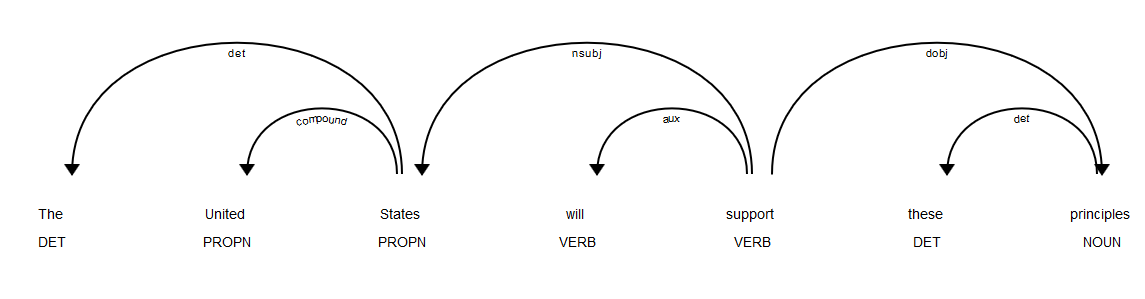

In [38]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [39]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3 = pd.DataFrame(row_list)

In [40]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,[]
1,1970,Your country has few peers in the contributio...,[]
2,1970,Your father was a leader in the League of Nat...,[you add chapter]
3,1970,In the United Nations community we have long ...,[]
4,1970,We are indeed fortunate to have you to lead u...,[]


In [41]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):
    
    if len(df_rule3.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule3.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [42]:
df_show.head()

,Year,Sentence,Output
0,1970,Your father was a leader in the League of Nat...,[you add chapter]
1,1970,It will care a great deal what we do about th...,[It care deal]
2,1970,Unless and until the Members of the United Na...,[Members demonstrate willingness]
3,1970,"We have sought, in the spirit of the Charter,...",[we urge others]
4,1970,If at last we can check the nuclear arms race...,[we check race]


In [43]:
# number of outputs
df_show.shape

(3366, 3)

In [44]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [45]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,Your father was a leader in the League of Nat...,1970,[you],add,[chapter]
1,It will care a great deal what we do about th...,1970,[It],care,[deal]
2,Unless and until the Members of the United Na...,1970,[Members],demonstrate,[willingness]
3,"We have sought, in the spirit of the Charter,...",1970,[we],urge,[others]
4,If at last we can check the nuclear arms race...,1970,[we],check,[race]


In [46]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

take       141
make       133
support     94
see         80
give        75
face        60
seek        52
build       48
provide     46
pursue      45
Name: Verb, dtype: int64

In [47]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
49,The United States strongly supports the strat...,1970,[States],support,[strategy]
123,We support his efforts,1971,[We],support,[efforts]
154,"And, in recognition of the importance of trad...",1972,[we],support,[participation]
169,From the start the United States has supporte...,1972,[States],support,[effort]
245,"In this spirit also, we support the permanent...",1973,[we],support,[membership]
341,We support the United Nations efforts in the ...,1974,[We],support,[efforts]
417,The United States supports the dual entry of ...,1975,[States],support,[entry]
420,The United States will support all efforts to...,1975,[States],support,[efforts]
436,We urge that groups of nations begin now to e...,1975,[States],support,[work]
444,The United States will support these principles,1975,[States],support,[principles]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [48]:
from spacy import displacy 
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [49]:
# function for rule 4
def rule4(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [50]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [51]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,"[warm congratulations, States delegation, fift..."
1,1970,Your country has few peers in the contributio...,[few peers]
2,1970,Your father was a leader in the League of Nat...,"[new chapter, family tradition]"
3,1970,In the United Nations community we have long ...,"[Nations community, able spokesman, very begin..."
4,1970,We are indeed fortunate to have you to lead u...,[]


In [52]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

for row in range(len(df_rule4)):
    
    if len(df_rule4.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule4.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [53]:
# number of matches 
df_show.shape

(6163, 3)

In [54]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,"[warm congratulations, States delegation, fift..."
1,1970,Your country has few peers in the contributio...,[few peers]
2,1970,Your father was a leader in the League of Nat...,"[new chapter, family tradition]"
3,1970,In the United Nations community we have long ...,"[Nations community, able spokesman, very begin..."
4,1970,During this session we shall commemorate with...,[creative events]
5,1970,It will care a great deal what we do about th...,[great deal]
6,1970,Indeed they are in many respects far graver,[many respects]
7,1970,Unless and until the Members of the United Na...,[world peoples]
8,1970,"In the view of the United States, the most cr...",[reliable framework]
9,1970,"there is no nobler destiny, nor any greater g...",[lasting peace]


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [55]:
# modifying rule 4
def rule4_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    # iterate over tokens
    for token in doc:
        
        if token.i == index:
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [56]:
# using rule 3 and rule 4
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [57]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule = pd.DataFrame(row_list)

In [58]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,[]
1,1970,Your country has few peers in the contributio...,[]
2,1970,Your father was a leader in the League of Nat...,[ you add new chapter]
3,1970,In the United Nations community we have long ...,[]
4,1970,We are indeed fortunate to have you to lead u...,[]


In [59]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show_mod = df_show_mod.append(df_rule.loc[row,:])

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [60]:
# number of matches
df_show_mod.shape

(3366, 3)

In [61]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,1970,Your father was a leader in the League of Nat...,[ you add new chapter]
1,1970,It will care a great deal what we do about th...,[ It care great deal]
2,1970,Unless and until the Members of the United Na...,[ Members demonstrate willingness]
3,1970,"We have sought, in the spirit of the Charter,...",[ we urge others]
4,1970,If at last we can check the nuclear arms race...,[ we check nuclear arms race]
5,1970,We have welcomed the efforts of the Federal R...,"[ We welcome efforts, we join NATO allies]"
6,1970,"In VietNam, over eighteen months ago, the Uni...",[ United States reverse trend]
7,1970,"We began a steady, uninterrupted reduction in...",[ We begin steady uninterrupted reduction]
8,1970,We have made a negotiated peace our highest p...,"[ We make peace, We make peace highest priority]"
9,1970,Although North VietNam has as yet shown no se...,"[ North VietNam show serious intention, VietN..."


In [62]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' we check nuclear arms race']
 If at last we can check the nuclear arms race, the world will have been helped to move away from its gravest danger and toward new and more rational relationships


In [63]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' United States give careful thought']
 In this anniversary year the United States, like many other Members, has given especially careful thought to means by which the United Nations can be better enabled to fulfill its purposes


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [64]:
# Sample sentence
from spacy import displacy 
displacy.render(nlp('''We all believe the benefits of globalization must 
be allocated more broadly within and among societies'''), 
                style='dep',jupyter=True)

In [65]:
# rule 5 function
def rule5(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [66]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    
    # rule
    output = rule5(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [67]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,"[congratulations of delegation, congratulation..."
1,1970,Your country has few peers in the contributio...,"[peers in contributions, work of Organization]"
2,1970,Your father was a leader in the League of Nat...,"[leader in League, session of Assembly, chapte..."
3,1970,In the United Nations community we have long ...,"[spokesman of country, participant in life, li..."
4,1970,We are indeed fortunate to have you to lead u...,[strengthening of Nations]


In [68]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule.loc[row,:])

# reset the index
df_show.reset_index(inplace = True, drop = True)

In [69]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,1970,It is my privilege to extend to you once agai...,"[congratulations of delegation, congratulation..."
1,1970,Your country has few peers in the contributio...,"[peers in contributions, work of Organization]"
2,1970,Your father was a leader in the League of Nat...,"[leader in League, session of Assembly, chapte..."
3,1970,In the United Nations community we have long ...,"[spokesman of country, participant in life, li..."
4,1970,We are indeed fortunate to have you to lead u...,[strengthening of Nations]


In [70]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [71]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,It is my privilege to extend to you once agai...,1970,congratulations,of,[delegation]
1,It is my privilege to extend to you once agai...,1970,congratulations,on,[election]
2,It is my privilege to extend to you once agai...,1970,election,to,[Presidency]
3,It is my privilege to extend to you once agai...,1970,session,of,[Assembly]
4,Your country has few peers in the contributio...,1970,peers,in,[contributions]
5,Your country has few peers in the contributio...,1970,work,of,[Organization]
6,Your father was a leader in the League of Nat...,1970,leader,in,[League]
7,Your father was a leader in the League of Nat...,1970,session,of,[Assembly]
8,Your father was a leader in the League of Nat...,1970,chapter,in,[tradition]
9,In the United Nations community we have long ...,1970,spokesman,of,[country]


In [72]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

of         6106
in         1224
for         875
to          579
on          357
with        236
between     204
from        153
against     126
by           92
Name: Preposition, dtype: int64

In [73]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
210,My Government continues strictly to observe r...,1970,sanctions,against,[regime]
692,This fact has often been cited in attacks aga...,1972,attacks,against,[]
728,The United Nations can also make a substantia...,1972,fight,against,[traffic]
772,"But political passion, however deeply held, c...",1972,violence,against,[persons]
773,Certainly the terrorist acts I have cited are...,1972,attacks,against,[fabric]
792,The draft articles on the prevention and puni...,1972,crimes,against,[agents]
815,These actions would mark a major advance in ...,1972,struggle,against,[terrorism]
1103,"The world community, therefore, must work urg...",1974,safeguards,against,[diversion]
1110,The United States will urge IAEA to draft an ...,1974,security,against,[theft]
1402,Procedural decisions can be based on the reco...,1975,violation,against,[State]
